In [4]:
import matplotlib.pyplot as plt
import numpy as np
import vector
import awkward as ak
import glob
from math import pi

In [5]:
def build_p4(data, ref):
  return vector.awk(
    ak.zip({
        "px": data[ref].x,
        "py": data[ref].y,
        "pz": data[ref].z,
        "mass": data[ref].tau
        
    })
    )

In [6]:
data = []
data_qcd = []
for f in glob.glob('/local/snandan/grid_withmorevar/Grid/ZH_Htautau/*parquet')[:150]:
    data.append(ak.Array(ak.from_parquet(f).tolist()))
for f in glob.glob('/local/snandan/grid_withmorevar/Grid/QCD/*parquet')[:150]:
    data_qcd.append(ak.Array((ak.from_parquet(f).tolist())))
data = ak.concatenate(data)
data_qcd = ak.concatenate(data_qcd)
print('data loaded')

data loaded


In [7]:
inner = data['inner_grid'].to_numpy()
inner_qcd = data_qcd['inner_grid'].to_numpy()

In [8]:
tau_p4=build_p4(data,'tau_p4s')
mask = abs(90 - (np.rad2deg(tau_p4.theta)-90)) >45

In [9]:
tau_p4_qcd=build_p4(data_qcd,'tau_p4s')
mask_qcd = abs(90 - (np.rad2deg(tau_p4_qcd.theta)-90)) >45

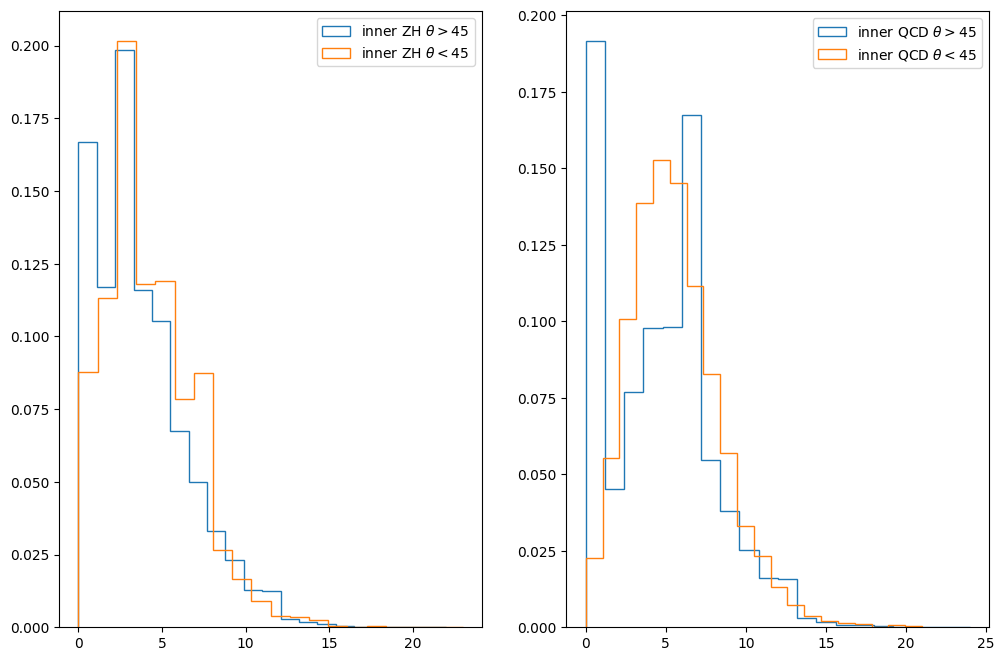

In [10]:
mul_br_zh = np.sum(np.sum(inner[mask,14:19,:,:], axis=(2,3))+np.sum(inner[mask,33:38,:,:], axis=(2,3)),axis=1)
mul_en_zh = np.sum(np.sum(inner[~mask,14:19,:,:], axis=(2,3))+np.sum(inner[~mask,33:38,:,:], axis=(2,3)),axis=1)
mul_br_qcd = np.sum(np.sum(inner_qcd[mask_qcd,14:19,:,:], axis=(2,3))+np.sum(inner_qcd[mask_qcd,33:38,:,:], axis=(2,3)),axis=1)
mul_en_qcd = np.sum(np.sum(inner_qcd[~mask_qcd,14:19,:,:], axis=(2,3))+np.sum(inner_qcd[~mask_qcd,33:38,:,:], axis=(2,3)),axis=1)
fig, axs0 = plt.subplots(1,2, figsize=(3*4,2*4))
plt.sca(axs0[0])
a,b,c=plt.hist(mul_br_zh,bins=20, histtype='step',label=r'inner ZH $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_zh,bins=20, histtype='step', label=r'inner ZH $\theta<45$', density=True)
plt.legend()
plt.sca(axs0[1])
a,b,c=plt.hist(mul_br_qcd,bins=20, histtype='step', label=r'inner QCD $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_qcd,bins=20, histtype='step', label=r'inner QCD $\theta<45$', density=True)
plt.legend()
#plt.text(-10,220,'particle multiplicity in inner grid')
#plt.tight_layout()

In [ ]:
#In both cases orange distribution is shifted towards right -> a bit higher particle multiplicity in endcap?

In [8]:
outer = data['outer_grid'].to_numpy()
outer_qcd = data_qcd['outer_grid'].to_numpy()

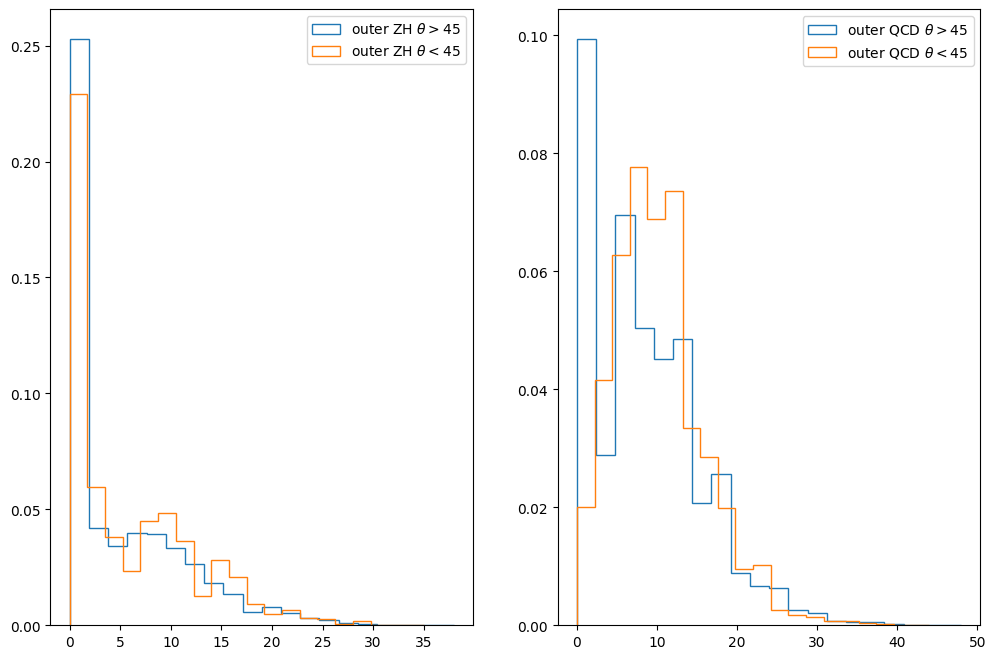

In [9]:
mul_br_zh = np.sum(np.sum(outer[mask,14:19,:,:], axis=(2,3))+np.sum(outer[mask,33:38,:,:], axis=(2,3)),axis=1)
mul_en_zh = np.sum(np.sum(outer[~mask,14:19,:,:], axis=(2,3))+np.sum(outer[~mask,33:38,:,:], axis=(2,3)),axis=1)
mul_br_qcd = np.sum(np.sum(outer_qcd[mask_qcd,14:19,:,:], axis=(2,3))+np.sum(outer_qcd[mask_qcd,33:38,:,:], axis=(2,3)),axis=1)
mul_en_qcd = np.sum(np.sum(outer_qcd[~mask_qcd,14:19,:,:], axis=(2,3))+np.sum(outer_qcd[~mask_qcd,33:38,:,:], axis=(2,3)),axis=1)
fig, axs0 = plt.subplots(1,2, figsize=(3*4,2*4))
plt.sca(axs0[0])
a,b,c=plt.hist(mul_br_zh,bins=20, histtype='step',label=r'outer ZH $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_zh,bins=20, histtype='step', label=r'outer ZH $\theta<45$', density=True)
plt.legend()

plt.sca(axs0[1])
a,b,c=plt.hist(mul_br_qcd,bins=20, histtype='step', label=r'outer QCD $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_qcd,bins=20, histtype='step', label=r'outer QCD $\theta<45$', density=True)
plt.legend()


In [ ]:
#same thing for outer grid also